In [11]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [33]:
id = 0
eval_loss = []
train_loss = []
for summary in summary_iterator("Dec08_07-49-01_ip-172-31-18-169/events.out.tfevents.1638949741.ip-172-31-18-169"):
    # print(summary)
    if id == 0:
        id += 1
        continue
    for v in summary.summary.value:
        if v.tag == 'eval_loss':
            eval_loss.append(v.simple_value)
        if v.tag == 'loss':
            train_loss.append(v.simple_value)

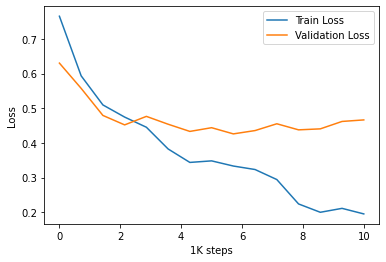

In [44]:
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline



X_Y_Spline = make_interp_spline(np.arange(len(train_loss)), train_loss)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(np.arange(len(train_loss)).min(), np.arange(len(train_loss)).max(), 15)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_, label  = "Train Loss")

X_Y_Spline = make_interp_spline(np.arange(len(eval_loss)), eval_loss)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(np.arange(len(eval_loss)).min(), np.arange(len(eval_loss)).max(), 15)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_, label  = "Validation Loss")


# plt.plot(np.arange(len(eval_loss)), eval_loss, label  = "Validation Loss")

plt.legend()
plt.xlabel("1K steps")
plt.ylabel("Loss")
plt.savefig("loss_curve.png", dpi=240)
plt.show()

In [45]:
import pandas as pd 

d1 = pd.read_csv("binary_data/train.csv")
d2 = pd.read_csv("binary_data/test.csv")

In [51]:
from collections import Counter as c

In [93]:
bd = {}

for i in range(0, 11):
    # if i*60 not in bd:
        bd[i] = {"preds": [], "gts": []}
td = dict(c(d1["name"].values))
m = {}
for name in td:
    m[name] = int(td[name] / 60)

In [94]:
tf = pd.read_csv("binary_data/test.csv")
preds = pd.read_csv("binary_data/predictions.csv")

for id, row in tf.iterrows():
    if row["name"] not in m:
        bd[0]["preds"].append(preds.loc[id].values[0]) 
        bd[0]["gts"].append(row["stars"]) 
    else:  
        bd[m[row["name"]]]["preds"].append(preds.loc[id].values[0])
        bd[m[row["name"]]]["gts"].append(row["stars"])

In [98]:
from sklearn.metrics import accuracy_score
accs = []
xs = []
for i in range(0, 11):
    accs.append(accuracy_score(bd[i]["gts"], bd[i]["preds"]))
    xs.append(i+0.5)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

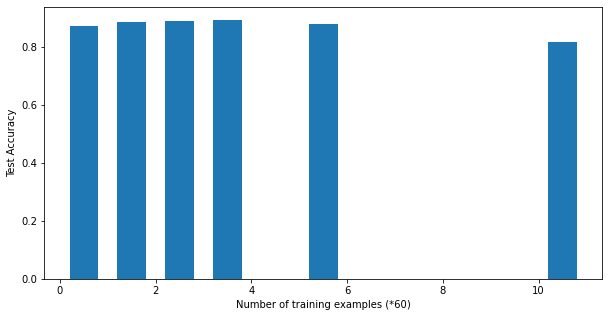

In [108]:

# # creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
# courses = list(data.keys())
# values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(xs, accs,
        width = 0.6)
 
plt.xlabel("Number of training examples (*60)")
plt.ylabel("Test Accuracy")
# plt.title("Students enrolled in different courses")
plt.savefig("balance.png", dpi=240)
plt.show()